In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
Tit= pd.read_csv('titanic_train.csv')

In [5]:
Tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
Tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
Tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

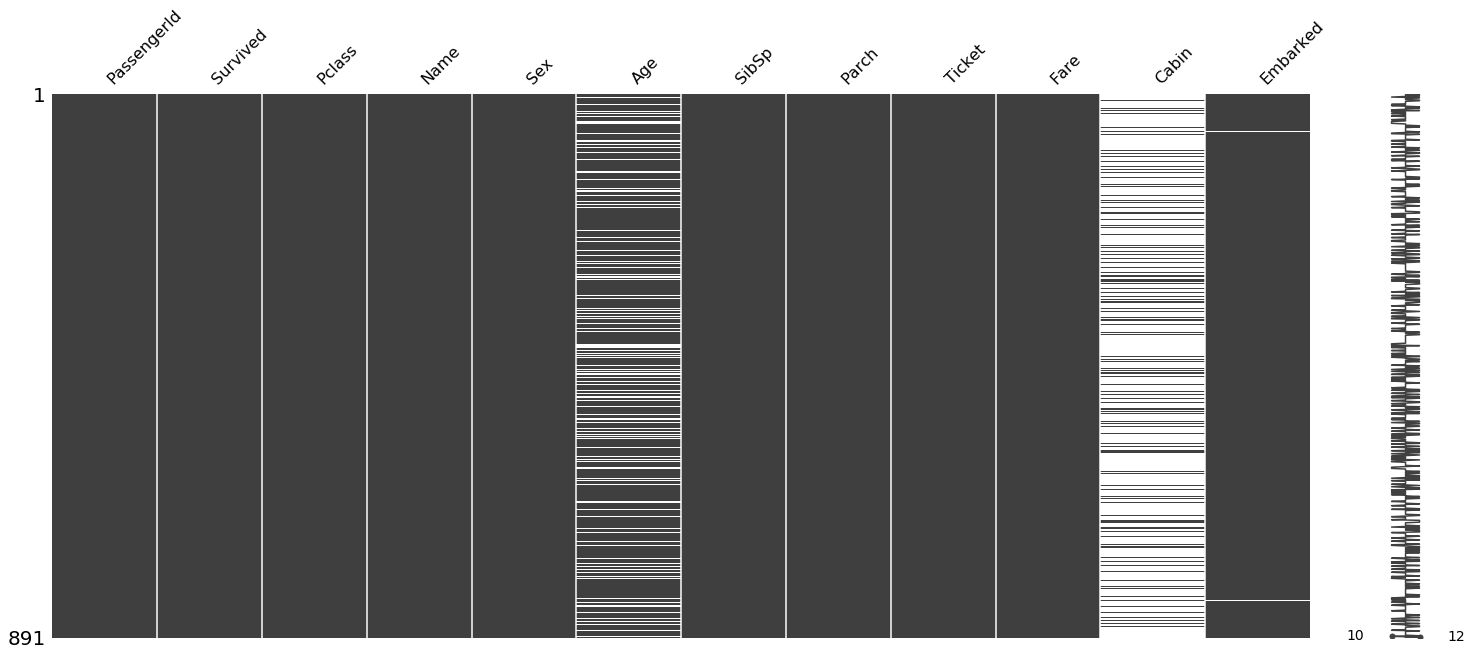

In [8]:
msno.matrix(Tit)

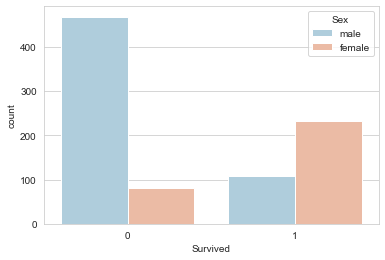

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=Tit,palette='RdBu_r')

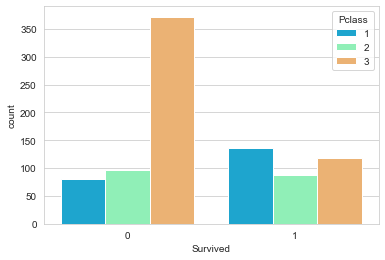

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=Tit,palette='rainbow')

In [6]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


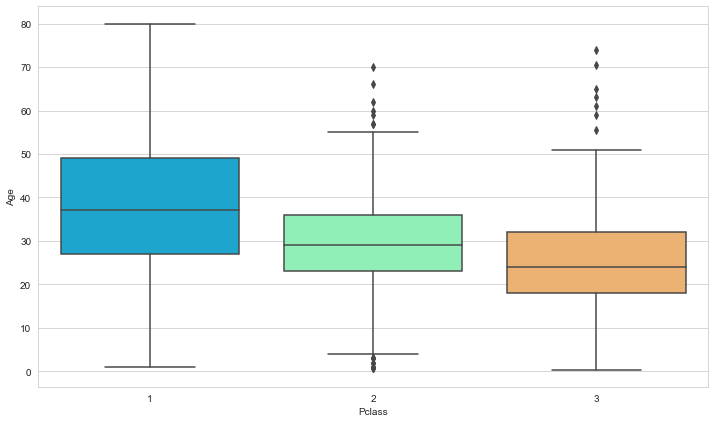

In [9]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',palette='rainbow',data=Tit)

In [30]:
def inpute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: 
            return 29
    else: 
        return Age

In [31]:
Tit['Age']=Tit[['Age','Pclass']].apply(inpute_age,axis=1)

In [32]:
Tit.Age.isnull().sum()

0

In [8]:
pd.get_dummies(Tit['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:
Tit.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [41]:
sex=pd.get_dummies(Tit['Sex'])
embark=pd.get_dummies(Tit['Embarked'])

In [13]:
Tit.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [42]:
Tit.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], dtype='object')

In [43]:
Tit=pd.concat([Tit,sex,embark],axis=1)

In [44]:
Tit.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C85,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,C123,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,0,1,0,0,1


In [55]:

Tit.drop('Cabin',axis=1,inplace=True)

In [62]:
Tit.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
       'C', 'Q', 'S'],
      dtype='object')

In [ ]:
X=[[]]

In [27]:
from sklearn.model_selection import train_test_split 

In [61]:
X_train, X_test, y_train, y_test = train_test_split( Tit.drop('Survived',axis=1),Tit['Survived'], test_size=0.3,  shuffle=True,random_state=43)

In [58]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
597,3,49.0,0,0,0.0000,0,1,0,0,1
476,2,34.0,1,0,21.0000,0,1,0,0,1
102,1,21.0,0,1,77.2875,0,1,0,0,1
361,2,29.0,1,0,27.7208,0,1,1,0,0
230,1,35.0,1,0,83.4750,1,0,0,0,1


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel= LogisticRegression
logmodel.fit(X_train,y_train)

TypeError: fit() missing 1 required positional argument: 'y'